<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Squeeze_and_Excitation_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Squeeze-and-Excitation Networks**

논문 링크: https://arxiv.org/abs/1709.01507

SeNet(Squeeze-and-Excitation Networks)은 2018년도에 CVPR에서 발표된 논문이다. 또한 2017년에 개최된 ILSVRC(ImageNet Large Scale Visual Recognition Challenge)에서 우승을 차지한 신경망(CNN)구조이다. top-5 error가 2.251%밖에 되지 않는다.

해당 논문은 SE block이라는 것을 제안했는데, 이는 어떤 모델에도 적용을 할 수 있으며, hyperparameter은 별로 늘지 않는 반면 성능은 꽤나 향상이 된다.

## **SeNet 구조**

### **SE block**

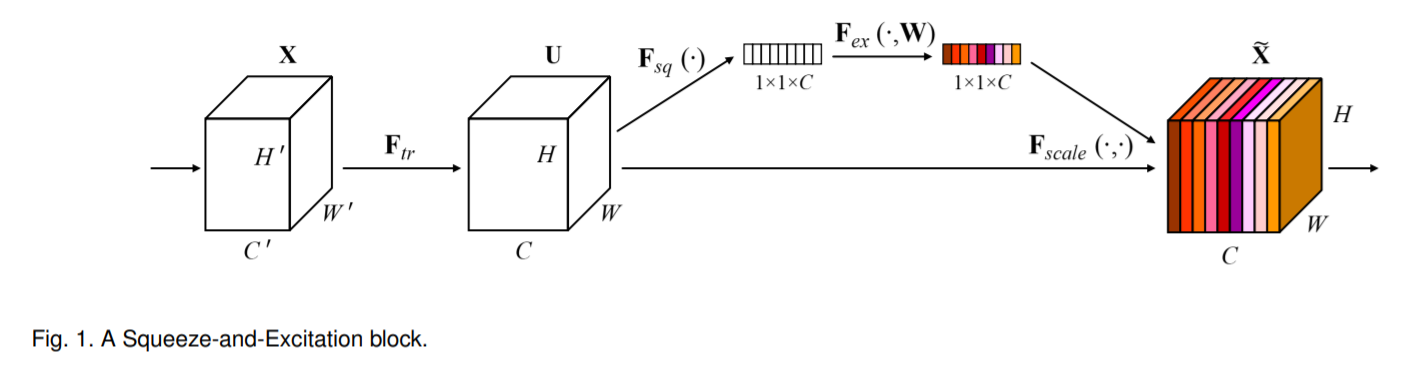

위의 그림이 바로 SE block이다. 해당 그림에서 X, U 둘다 feature이고 F(tr)은 Convolution이다.

그림을 해석해보자면 먼저, **H' x W' x C' 크기의 feature-map X**가 F(tr)을 통하여 **H x W x C 크기의 feature-map U**가 된다. 그리고 **스퀴즈(squeeze)**를 실행한다. C개 채널의 2차원 (H x W)의 feature-map들을 1 x 1 크기의 feature-map으로 변환해주는 것이다. 간단히 **global average pooling (GAP)**을 통해 각 2차원의 feature-map을 평균내어 하나의 값을 얻는다.

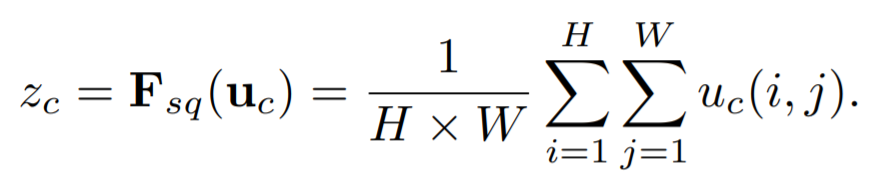

이로인해 각 채널을 하나의 숫자로 묘사할 수 있게 된다. 총 C개 채널의 feature-map이 있으므로 1 x 1 x c 크기의 feature-map으로 스퀴즈(squeeze)가 된다. 즉, feature-map을 global하게 표현한 것이다. 간단하게 convolution이 local 정보를 다룬다면, squeeze는 global 정보를 다룬다고 생각하면 된다.

squeeze 후에는 활성화(activation) 작업을 한다. 두 개의 Fully-Connected 층을 추가하여 각 채널의 상대적 중요도를 알아낸다.

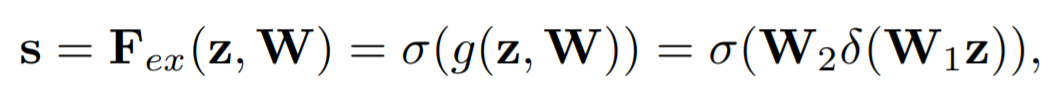

위의 식에서 σ는 sigmoid이고, δ는 ReLU이다. 식을 살펴보면 squeeze를 통해 얻은 z(c)를 input으로 삼아 W1 가중치로 Fully-Connected해준 뒤, 해당 output을 ReLU로 활성화를 해주고 W2 가중치로 Fully-Connected를 해준다. 또 다시 해당 output을 sigmoid로 활성화를 시켜 0과 1사이의 값을 갖게 한다. 해당 값으로 상대적 중요를 0~1 사이의 값으로 판단할 수 있게 된다.

여기서 중요한 점은 Fully-Connected 층들이 병목(bottle-neck)구조란 점이다. hidden layer의 뉴런 갯수를 입력층보다 작게 한다. 그리고 출력 층의 뉴런 갯수는 입력층과 동일하게 한다. 이러한 병목 구조덕분에 hyper-parameter의 갯수를 덜 늘릴수 있고, 일반화에도 도움이 된다.